<b>The following outcomes would ideally be expected from the following 4 weeks of internship:
<li>Build an AI algorithm that can classify the cancer type. 
<li>Decrease the amount of predictors while keeping the accuracy high.
<li>Identify the key predictors when a sample has been classified and report on these predictors through a graph, picture etc.
<li>The dataset must be utilised in a 60/40 Train/Test split.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

In [2]:
data = pd.read_csv("IX_CancerData_TB.csv")

# <span style="color:orange">EDA</span>

In [3]:
data.head(3)

,Unnamed: 0,Type,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,1,BRCA,0.017243,0.000000,1.557943,0.0,5.017788,6.132192,0.0,0.017186,...,0.007595,0.007793,0.0,0.055523,0.028739,10.243520,0.250405,0.0,0.613717,0.0
1,2,BRCA,0.000000,0.003233,2.697767,0.0,4.903484,9.750896,0.0,0.014376,...,0.030789,0.063184,0.0,0.000000,0.000000,16.606613,0.082307,0.0,0.170743,0.0
2,3,BRCA,0.000000,0.000000,5.831249,0.0,3.054890,17.232771,0.0,0.006936,...,0.144831,0.000000,0.0,0.058823,0.121788,20.069360,0.530575,0.0,0.305974,0.0


In [4]:
data.dtypes

Unnamed: 0              int64
Type                   object
ENSG00000242268.2     float64
ENSG00000270112.3     float64
ENSG00000167578.15    float64
                       ...   
ENSG00000105063.17    float64
ENSG00000231119.2     float64
ENSG00000280861.1     float64
ENSG00000123685.7     float64
ENSG00000181518.3     float64
Length: 58442, dtype: object

In [5]:
data.isna().sum()

Unnamed: 0            0
Type                  0
ENSG00000242268.2     0
ENSG00000270112.3     0
ENSG00000167578.15    0
                     ..
ENSG00000105063.17    0
ENSG00000231119.2     0
ENSG00000280861.1     0
ENSG00000123685.7     0
ENSG00000181518.3     0
Length: 58442, dtype: int64

### <span style="color:orange">Data Cleaning</span>

In [6]:
#count the number of zeros in each column
#calculate the percentage
#keep track of the columns that have less than 40% zeros

cols = []

for col in data:
    c = data[col]
    z = (c == 0).sum()
    zeros = z / 2109 * 100
    if zeros < 40:
        cols += [col]

In [7]:
data = data.loc[:, cols]

<b>Cancer Types:
<li>BRCA: Breast Invasive Carcinoma
<li>BLCA: Bladder Urothelial Carcinoma
<li>HNSC: Head and Neck Squamous Cell Carcinoma
<li>KIRC: Kidney Renal Clear Cell Carcinoma
<li>KIRP: Kidney Renal Papillary Cell Carcinoma
<li>COAD: Colon Adenocarcinoma
<li>LIHC: Liver Hepatocellular Carcinoma
<li>LUAD: Lung Adenocarcinoma
<li>LUSC: Lung Squamous Cell Carcinoma	
<li>OV: Ovarian Serous Cystadenocarcinoma
<li>PRAD: Prostate Adenocarcinoma

In [8]:
#divide dataframe according to cancer type
BRCA = data.loc[data.Type=="BRCA", cols]
BLCA = data.loc[data.Type=="BLCA", cols]
HNSC = data.loc[data.Type=="HNSC", cols]
KIRC = data.loc[data.Type=="KIRC", cols]
KIRP = data.loc[data.Type=="KIRP", cols]
COAD = data.loc[data.Type=="COAD", cols]
LIHC = data.loc[data.Type=="LIHC", cols]
LUAD = data.loc[data.Type=="LUAD", cols]
LUSC = data.loc[data.Type=="LUSC", cols]
OV = data.loc[data.Type=="OV", cols]
PRAD = data.loc[data.Type=="PRAD", cols]

### <span style="color:orange">Dimension reduction</span>

In [9]:
data.describe()

,Unnamed: 0,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,...,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000231612.1,ENSG00000009694.12,ENSG00000186115.11,ENSG00000267117.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000123685.7
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,1055.000000,3.635264,4.182546,13.169315,0.200361,191.930469,0.167644,27.762056,0.082159,3.047173,...,0.457871,4.370198,17.802599,0.095321,0.743316,3.191828,0.212433,15.504560,0.449303,0.863953
std,608.960179,2.350044,4.770590,7.283324,0.554549,160.992823,0.525611,12.383856,0.298873,11.141904,...,0.394194,3.104703,96.470054,0.215028,1.982985,12.021718,0.295863,7.051332,1.092886,1.015627
min,1.000000,0.435606,0.173593,0.531652,0.000000,18.880745,0.000000,4.958876,0.000000,0.000000,...,0.000000,0.236996,0.051239,0.000000,0.000000,0.000000,0.000000,0.898690,0.000000,0.014896
25%,528.000000,2.182142,2.328920,8.434296,0.018071,109.160270,0.027155,19.503659,0.012565,0.137321,...,0.205244,2.083603,1.126628,0.000000,0.016733,0.005259,0.047337,10.842311,0.091179,0.304265
50%,1055.000000,3.058661,3.590556,11.763797,0.077476,156.024028,0.068786,25.468607,0.032287,0.462232,...,0.351039,3.668490,2.489735,0.043291,0.095683,0.032998,0.122367,14.466283,0.203892,0.550797
75%,1582.000000,4.420560,5.146582,16.141889,0.196730,224.153528,0.142558,33.587505,0.069338,1.859535,...,0.589566,5.754199,4.972762,0.110292,0.640128,0.334817,0.256152,18.971165,0.414331,1.041430
max,2109.000000,38.696938,187.851601,61.809897,12.721510,3887.038686,9.731571,124.233477,6.089799,259.338758,...,4.274700,33.688644,1848.813610,3.547062,29.166522,158.911979,3.552154,94.792173,19.762116,13.888980


In [10]:
# Source: https://github.com/greenelab/tybalt/blob/master/process_data.ipynb
num_mad_genes = 5000

In [11]:
# dimension reduction for entire data frame
mad_genes = data.mad(axis=0).sort_values(ascending=False)
top_mad_genes = mad_genes.iloc[0:num_mad_genes, ].index
reduced_df = data.loc[:, top_mad_genes]

# dimension reducation for BRCA data 
mad_genes_BRCA = BRCA.mad(axis=0).sort_values(ascending=False)
top_mad_genes_BRCA = mad_genes_BRCA.iloc[0:num_mad_genes, ].index
reduced_BRCA = BRCA.loc[:, top_mad_genes_BRCA]

# dimension reducation for BLCA data 
mad_genes_BLCA = BLCA.mad(axis=0).sort_values(ascending=False)
top_mad_genes_BLCA = mad_genes_BLCA.iloc[0:num_mad_genes, ].index
reduced_BLCA = BLCA.loc[:, top_mad_genes_BLCA]

# dimension reducation for HNSC data 
mad_genes_HNSC = HNSC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_HNSC = mad_genes_HNSC.iloc[0:num_mad_genes, ].index
reduced_HNSC = HNSC.loc[:, top_mad_genes_HNSC]

# dimension reducation for KIRC data 
mad_genes_KIRC = KIRC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_KIRC = mad_genes_KIRC.iloc[0:num_mad_genes, ].index
reduced_KIRC = KIRC.loc[:, top_mad_genes_KIRC]

# dimension reducation for KIRP data 
mad_genes_KIRP = KIRP.mad(axis=0).sort_values(ascending=False)
top_mad_genes_KIRP = mad_genes_KIRP.iloc[0:num_mad_genes, ].index
reduced_KIRP = KIRP.loc[:, top_mad_genes_KIRP]

# dimension reducation for COAD data 
mad_genes_COAD = COAD.mad(axis=0).sort_values(ascending=False)
top_mad_genes_COAD = mad_genes_COAD.iloc[0:num_mad_genes, ].index
reduced_COAD = COAD.loc[:, top_mad_genes_COAD]

# dimension reducation for LIHC data 
mad_genes_LIHC = LIHC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_LIHC = mad_genes_LIHC.iloc[0:num_mad_genes, ].index
reduced_LIHC = LIHC.loc[:, top_mad_genes_LIHC]

# dimension reducation for LUAD data 
mad_genes_LUAD = LUAD.mad(axis=0).sort_values(ascending=False)
top_mad_genes_LUAD = mad_genes_LUAD.iloc[0:num_mad_genes, ].index
reduced_LUAD = LUAD.loc[:, top_mad_genes_LUAD]

# dimension reducation for LUSC data 
mad_genes_LUSC = LUSC.mad(axis=0).sort_values(ascending=False)
top_mad_genes_LUSC = mad_genes_LUSC.iloc[0:num_mad_genes, ].index
reduced_LUSC = LUSC.loc[:, top_mad_genes_LUSC]

# dimension reducation for OV data 
mad_genes_OV = OV.mad(axis=0).sort_values(ascending=False)
top_mad_genes_OV = mad_genes_OV.iloc[0:num_mad_genes, ].index
reduced_OV = OV.loc[:, top_mad_genes_OV]

# dimension reducation for PRAD data 
mad_genes_PRAD = PRAD.mad(axis=0).sort_values(ascending=False)
top_mad_genes_PRAD = mad_genes_PRAD.iloc[0:num_mad_genes, ].index
reduced_PRAD = PRAD.loc[:, top_mad_genes_PRAD]

In [13]:
reduced_df.head()

,ENSG00000198938.2,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,ENSG00000198763.3,...,ENSG00000167986.12,ENSG00000089154.9,ENSG00000106268.14,ENSG00000164182.9,ENSG00000177548.11,ENSG00000124839.11,ENSG00000135211.5,ENSG00000234127.7,ENSG00000105063.17,ENSG00000159251.6
0,5074.278246,5715.880814,5004.261682,5729.058331,4935.502794,4306.842875,2313.986776,2969.173798,1445.119139,2832.470551,...,30.826291,24.637688,7.048504,5.441224,8.376339,5.756629,13.379667,52.640768,10.243520,0.002639
1,6194.761496,4039.803827,6160.714848,3440.555180,3892.533127,2478.191087,2143.519988,2975.924023,1718.066499,2554.411329,...,32.603710,17.822185,5.367048,8.084820,5.391405,4.358179,14.651681,23.165836,16.606613,0.064192
2,4332.811846,4166.421909,5240.735453,4351.111406,2128.511701,2877.755003,1933.865667,2651.692939,981.969369,1382.033304,...,31.698009,14.886280,3.036551,7.805203,10.004771,12.121625,12.628083,13.465283,20.069360,0.100654
3,11001.114329,15194.472213,10281.684334,9390.479701,5453.793771,9152.916688,7389.151377,6590.892765,2148.404575,9441.549791,...,19.131908,17.684747,9.519491,10.675469,16.824475,10.961503,18.776591,23.635495,18.965261,0.051437
4,4798.912802,3297.681653,3537.835993,4577.812422,2819.806095,3783.386260,3885.520011,2857.009352,2461.139530,2508.446424,...,20.753731,12.676651,5.535004,11.425373,15.383321,10.263751,20.639182,21.484331,12.879618,0.003755


### <span style="color:orange">Scale</span> 

In [23]:
scaler = StandardScaler().fit_transform(reduced_df.iloc[:, 2:])

In [24]:
scaled_df = pd.DataFrame(scaler, columns=reduced_df.columns[2:], index=reduced_df.index)

In [25]:
scaled_df.head()

,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,ENSG00000198763.3,ENSG00000198888.2,ENSG00000163631.15,...,ENSG00000167986.12,ENSG00000089154.9,ENSG00000106268.14,ENSG00000164182.9,ENSG00000177548.11,ENSG00000124839.11,ENSG00000135211.5,ENSG00000234127.7,ENSG00000105063.17,ENSG00000159251.6
0,-0.474883,-0.344257,-0.165111,-0.328313,-0.564051,-0.429276,-0.571959,-0.393373,-0.401808,-0.243836,...,1.521022,1.399637,-0.241892,-1.174678,-0.070712,-0.222924,-0.434989,4.953965,-0.746283,-0.160249
1,-0.326560,-0.649241,-0.295803,-0.682594,-0.601717,-0.427799,-0.515755,-0.466821,-0.466869,-0.243829,...,1.777577,0.388560,-0.441115,-0.785109,-0.429716,-0.426848,-0.255697,0.684010,0.156327,-0.157061
2,-0.444554,-0.527893,-0.516848,-0.605183,-0.648042,-0.498755,-0.667329,-0.776500,-0.882428,-0.243856,...,1.646847,-0.046980,-0.717237,-0.826314,0.125143,0.705233,-0.540925,-0.721284,0.647521,-0.155172
3,0.201980,0.143694,-0.100166,0.610560,0.557347,0.363318,-0.427141,1.352388,1.408679,-0.243833,...,-0.166959,0.368171,0.050876,-0.403343,0.945364,0.536061,0.325714,0.752048,0.490903,-0.157721
4,-0.662961,-0.497681,-0.430224,-0.429727,-0.216808,-0.453823,-0.362744,-0.478962,-0.134560,-0.243792,...,0.067137,-0.374777,-0.421215,-0.292834,0.772033,0.434314,0.588248,0.440415,-0.372350,-0.160191


In [26]:
# add type column back to data frame 
df = pd.concat([data.iloc[:,1], scaled_df], axis=1)

In [28]:
df

,Type,ENSG00000198804.2,ENSG00000198886.2,ENSG00000210082.2,ENSG00000198899.2,ENSG00000198840.2,ENSG00000198727.2,ENSG00000087086.12,ENSG00000198763.3,ENSG00000198888.2,...,ENSG00000167986.12,ENSG00000089154.9,ENSG00000106268.14,ENSG00000164182.9,ENSG00000177548.11,ENSG00000124839.11,ENSG00000135211.5,ENSG00000234127.7,ENSG00000105063.17,ENSG00000159251.6
0,BRCA,-0.474883,-0.344257,-0.165111,-0.328313,-0.564051,-0.429276,-0.571959,-0.393373,-0.401808,...,1.521022,1.399637,-0.241892,-1.174678,-0.070712,-0.222924,-0.434989,4.953965,-0.746283,-0.160249
1,BRCA,-0.326560,-0.649241,-0.295803,-0.682594,-0.601717,-0.427799,-0.515755,-0.466821,-0.466869,...,1.777577,0.388560,-0.441115,-0.785109,-0.429716,-0.426848,-0.255697,0.684010,0.156327,-0.157061
2,BRCA,-0.444554,-0.527893,-0.516848,-0.605183,-0.648042,-0.498755,-0.667329,-0.776500,-0.882428,...,1.646847,-0.046980,-0.717237,-0.826314,0.125143,0.705233,-0.540925,-0.721284,0.647521,-0.155172
3,BRCA,0.201980,0.143694,-0.100166,0.610560,0.557347,0.363318,-0.427141,1.352388,1.408679,...,-0.166959,0.368171,0.050876,-0.403343,0.945364,0.536061,0.325714,0.752048,0.490903,-0.157721
4,BRCA,-0.662961,-0.497681,-0.430224,-0.429727,-0.216808,-0.453823,-0.362744,-0.478962,-0.134560,...,0.067137,-0.374777,-0.421215,-0.292834,0.772033,0.434314,0.588248,0.440415,-0.372350,-0.160191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,KIRP,3.767631,2.345599,2.008942,1.162152,1.071665,2.886047,1.495768,0.878433,0.783641,...,0.137784,-0.386503,-0.782958,-0.434296,0.086322,2.869157,-0.689242,-0.463384,-0.020184,-0.158763
2105,KIRP,0.394025,1.362803,0.078629,1.376857,1.322545,1.212670,-0.666381,1.456461,0.855361,...,-0.366270,-0.551311,-0.441133,-0.873178,0.793294,1.910771,0.089548,-0.136845,-0.252107,-0.150198
2106,KIRP,-0.586326,0.064854,-0.337621,0.480268,0.851695,0.421161,-0.589207,-0.249286,-0.395532,...,0.038876,0.424708,-0.310809,-1.178212,0.458948,0.235967,0.126679,-0.701162,-0.686194,-0.159554
2107,KIRP,1.002459,0.789552,0.278208,0.654578,0.867780,0.705349,0.514233,0.901098,0.561091,...,-0.443787,-0.474628,-0.203418,-0.477086,-0.140709,1.654884,1.305478,-0.309358,-0.533349,-0.158379


### <span style="color:orange">Data Visualization</span>

# <span style="color:orange">Models</span>

In [62]:
x_data = df.iloc[:,1:]
y_data = df.iloc[:,0]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state = 1)

### <span style="color:orange">Classification Tree</span>

In [82]:
tree = DecisionTreeClassifier()
tree.fit(X = x_train, y = y_train)

DecisionTreeClassifier()

In [85]:
y_pred = tree.predict(x_test)
print('Classification accuracy = ', np.sum(y_test==y_pred)/y_test.shape[0])

conf_matrix = pd.crosstab(y_test, y_pred)
conf_matrix

Classification accuracy =  0.9940758293838863


col_0,BLCA,BRCA,COAD,HNSC,KIRC,KIRP,LIHC,LUAD,LUSC,OV,PRAD
Type,,,,,,,,,,,
BLCA,77,0,0,0,0,0,0,0,0,0,0
BRCA,0,75,0,0,0,0,0,0,0,0,0
COAD,0,0,85,0,0,0,0,0,0,1,0
HNSC,0,0,0,72,0,0,0,0,0,0,0
KIRC,0,0,0,0,77,0,0,0,0,0,0
KIRP,0,0,0,0,0,68,0,0,0,1,0
LIHC,1,0,0,0,1,0,62,0,0,0,0
LUAD,0,0,0,0,0,0,0,76,0,0,0
LUSC,0,0,0,0,0,0,0,0,79,0,0


Text(0, 0.5, 'Training Error')

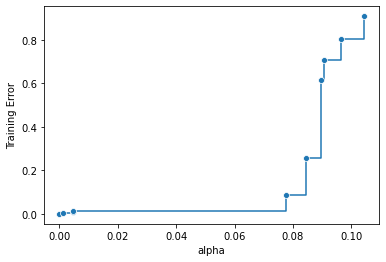

In [86]:
path = tree.cost_complexity_pruning_path(X=x_test, y=y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

p = sns.lineplot(x=ccp_alphas, y=impurities, marker='o', drawstyle='steps-post')
p.set_xlabel('alpha')
p.set_ylabel('Training Error')

In [88]:
cv_accuracy = []

for a in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=a)
    cv_score = cross_val_score(model, X=x_test, y=y_test , scoring="accuracy", cv=10).mean()
    cv_accuracy.append(cv_score)

(0.2, 0.98)

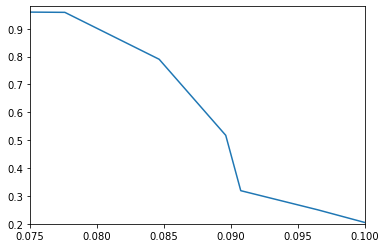

In [92]:
p = sns.lineplot(x=ccp_alphas, y=cv_accuracy)
p.set_xlim(0.075,0.10)
p.set_ylim(0.20,0.98)

In [95]:
def draw_classification_tree(tree, feature_names, class_names):
    dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=feature_names, 
                         class_names=class_names,
                         filled=True, 
                         rounded=True,  
                         special_characters=True,
                               proportion = True) 
    
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree',view=True)

In [96]:
tree_pruned = DecisionTreeClassifier(ccp_alpha=0.01)
tree_pruned.fit(X = x_test, y = y_test)

DecisionTreeClassifier(ccp_alpha=0.01)

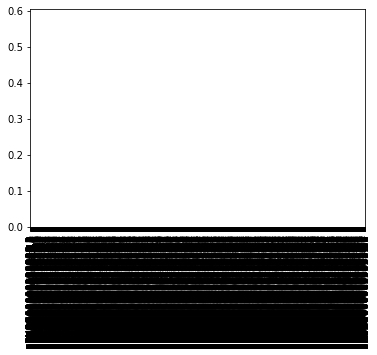

In [121]:
p = sns.barplot(x=x_test.columns[0:], y=tree_pruned.feature_importances_)
p = p.set_xticklabels(labels=x_test.columns[0:], rotation=90)

In [129]:
draw_classification_tree(tree=tree_pruned, feature_names=x_test.columns[0:], class_names=y_test)

KeyError: 9

### <span style="color:orange">KNN</span>

In [76]:
knn = KNeighborsRegressor()

In [65]:
knn.fit(X = x_train, y = y_train)

KNeighborsRegressor()

In [58]:
yhat = knn.predict(X = x_test)
yhat

TypeError: unsupported operand type(s) for /: 'str' and 'int'